In [409]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
a = pd.read_excel('Churn.xlsx')

<IPython.core.display.Javascript object>

In [269]:
a

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Handling Null values and Outliers
- Replaced null values in Total_charges column with the mean value
- Since mere 11 values are null from 7034 values, its distribution won't be affected 
- No outliers were found in any of the three columns - 'tenure' , 'TotalCharges', 'MonthlyCharges'

In [72]:
a.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [2]:
a.TotalCharges.fillna(a.TotalCharges.mean(), inplace = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='tenure'>

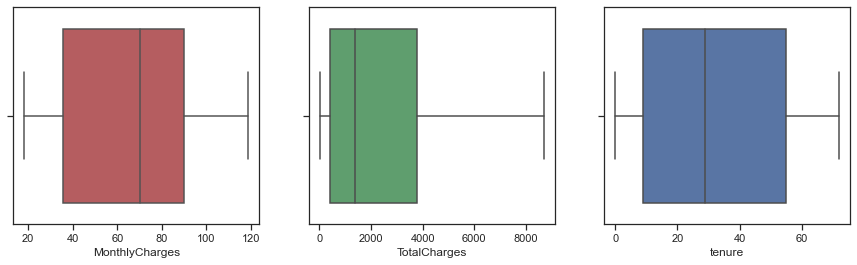

In [215]:
sns.set_context('notebook')
plt.figure(figsize = (15,4))
plt.subplot(131)
sns.boxplot(a.MonthlyCharges, color = 'r')
plt.subplot(132)
sns.boxplot(a.TotalCharges, color = 'g')
plt.subplot(133)
sns.boxplot(a.tenure)

### Checking skewness  
- TotalCharges shows skewness (skewness value should lie within [-0.5 to 0.5] to be normally distributed)
- But it won't affect our model as this feature would be dropped due to high multicollinearity

In [70]:
a.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
Churn             1.063031
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

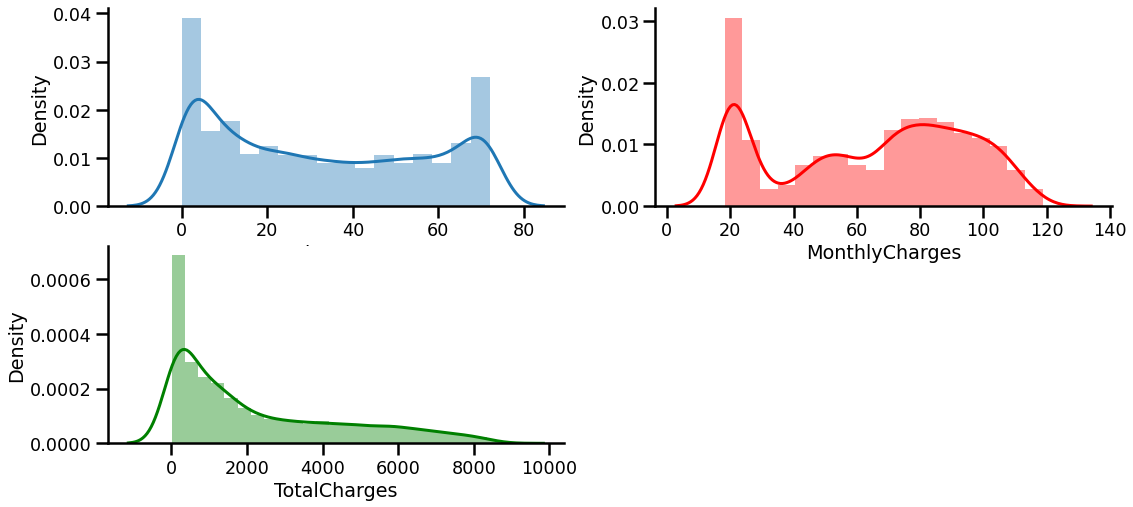

In [435]:
plt.figure(figsize = (18,8))
sns.set_context(context = 'poster', font_scale = 0.8)

plt.subplot(221)
sns.distplot(a.tenure)
plt.subplot(222)
sns.distplot(a.MonthlyCharges, color = 'r')
plt.subplot(223)
sns.distplot(a.TotalCharges, color = 'g')
sns.despine()

### Replacing ''No Internet Service" with simple ''No''
- "No Internet Service" would create an extra category within different columns despite being equivalent to "No"
- This would unnecessarily increase number of columns after appling one_hot_encoding
- Any different info that "No Internet Service" would give will already be included by the "No" present in InternetService column

In [3]:
for i in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    a[i] = np.where(a['InternetService']=='No', 'No', a[i])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
a.MultipleLines = np.where(a.PhoneService=='No', 'No', a.MultipleLines)    

<IPython.core.display.Javascript object>

## Model Creation
- Logistic Regression has been used to create the churn model 
- Its performance came out to be better than other algorithms eg RandomForestCLassifier, KNN
- Approach
    1. Encoding categorical variables - used One_hot_encoding
    2. Checked for Multicollinearity amongst variables using VIF
    3. Checked correlation of variables with output (Churn) 
    4. Feature selection based on step-2 and step-3
    5. Dataset (7043) was divided into train (4000) and test (3073) data using train_test_split
    5. Did over-sampling of train data using RandomOverSampler in order to reduce imbalance (required for logistic regression)
    6. Hyperparameter tuning was done to determine hyperparameters
        - Solver = 'sag'
        - max_iter = 400
        - C = 0.1
    7. Measured performance using accuracy_score, confusion_matrix and classification report

### 1. One Hot Encoding

In [6]:
b = a.drop('customerID', axis = 1)

In [7]:
b = pd.get_dummies(b,drop_first = True)
b.head()

<IPython.core.display.Javascript object>

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1


### 2. Checking Multicollinearity using VIF
- Will remove those variables having high VIF value (>10)
    - MonthlyCharges - VIF value: 210
    - TotalCharges - VIF value: 17.7
    - PhoneServie - VIF value: 9.3 (though <10 but low correlation with Churn as well ~ 0.012)

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [241]:
X = b.drop(['Churn_Yes','MonthlyCharges', 'TotalCharges', 'PhoneService_Yes'], axis=1)
vif = pd.DataFrame() ## creating a dataframe
vif['features'] = X.columns ## The rows will be the columns of a
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])] ## iterating thru a's columns

<IPython.core.display.Javascript object>

In [242]:
vif

,features,VIF
0,SeniorCitizen,1.362528
1,tenure,7.392978
2,gender_Male,1.886287
3,Partner_Yes,2.812840
4,Dependents_Yes,1.955141
5,MultipleLines_Yes,2.306164
6,InternetService_Fiber optic,2.894843
7,InternetService_No,2.532006
8,OnlineSecurity_Yes,1.900309
9,OnlineBackup_Yes,2.083109


### 3. Correlation of variables with Churn

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

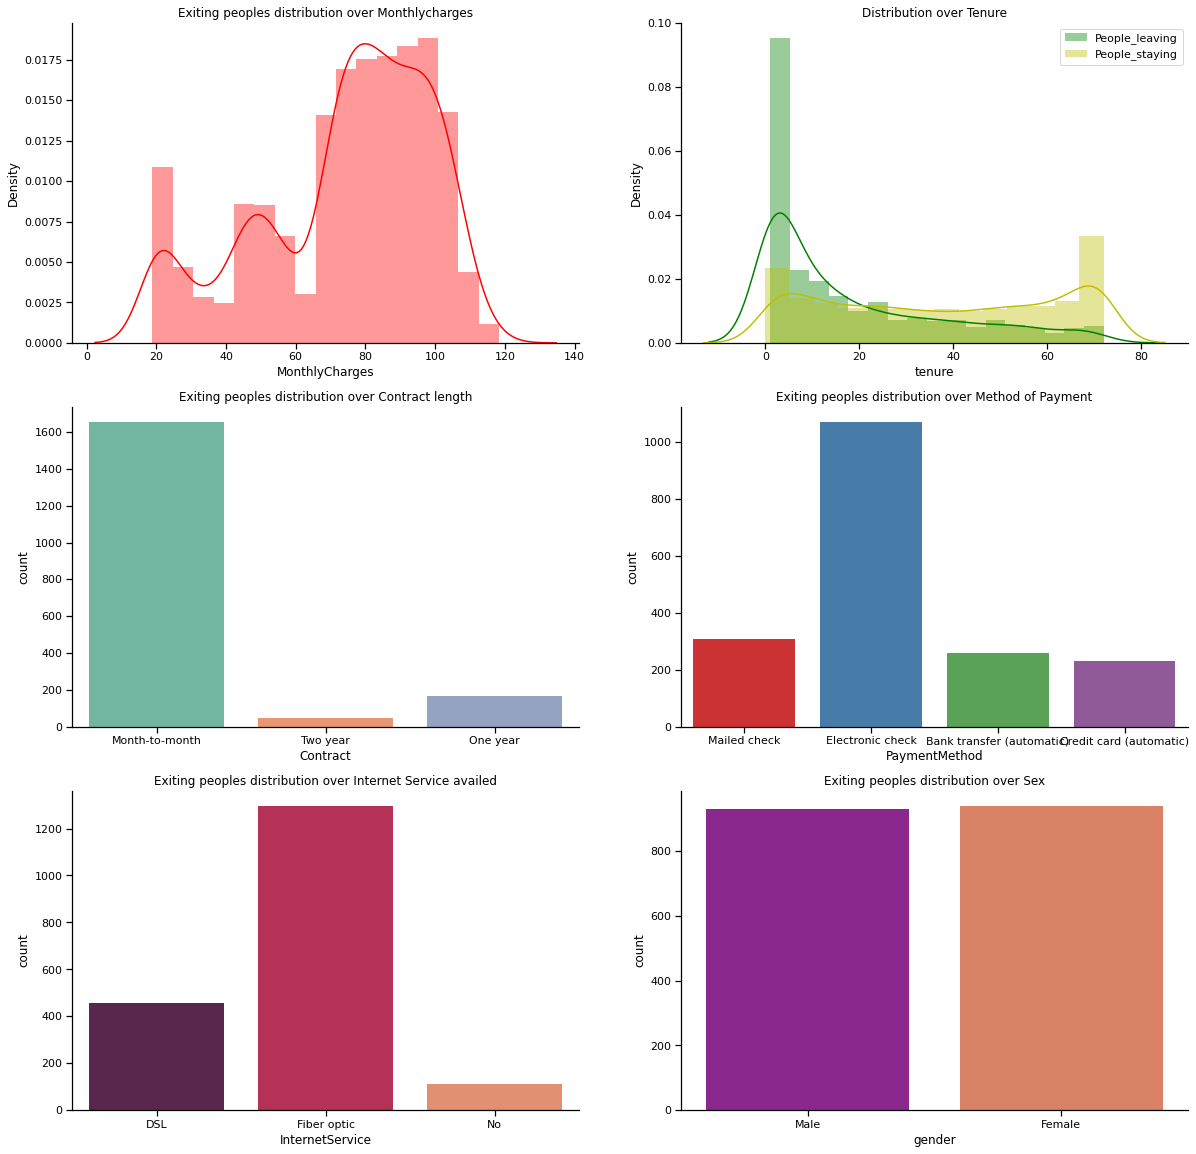

In [430]:
plt.figure(figsize = (20,20))

sns.set_context('notebook')
plt.subplot(321)

plt.title('Exiting peoples distribution over Monthlycharges')
sns.distplot(a[a.Churn=='Yes'].MonthlyCharges, color = 'r')
plt.subplot(322)
plt.title('Distribution over Tenure')
sns.distplot(a[a.Churn=='Yes'].tenure, color = 'g', label='People_leaving')
sns.distplot(a[a.Churn=='No'].tenure, color = 'y', label='People_staying')
plt.legend()
plt.subplot(323)
plt.title('Exiting peoples distribution over Contract length')
sns.countplot(a[a['Churn']=='Yes'].Contract, palette = 'Set2')
plt.subplot(324)
plt.title('Exiting peoples distribution over Method of Payment')
sns.countplot(a[a['Churn']=='Yes'].PaymentMethod, palette = 'Set1')
plt.subplot(325)
plt.title('Exiting peoples distribution over Internet Service availed')
sns.countplot(a[a['Churn']=='Yes'].InternetService, palette = 'rocket')
plt.subplot(326)
plt.title('Exiting peoples distribution over Sex')
sns.countplot(a[a['Churn']=='Yes'].gender, palette = 'plasma')
sns.despine()

### Key factors predicting churn + Offers to reduce attrition rate
1. Tenure:
    - Inference - Majority of the people left during initial days of their tenure 
    - Reason - First impression of service provided might not have been great 
    - Sol - Give incentives (eg free internet/calls during night) to prevent people from leaving in the initial days
2. Contract:
    - Inference - Most people who left were on Month-to-Month contract
    - Reason - short-term contract allows more flexibility in switching telecom network 
    - Sol - Make one/two year contracts more attractive (cheaper) than month-to-month contract (eg seen in Gym membership charges)
3. Payment Method:
    - Inference - Most people who left used electronic check as payment mode
    - Reason - Electronic check might not get credited instantly or acknowledged immediately by service provider
    - Sol - Offer cashbacks eg tie-up with digital payment companies like PayTm to provide vouchers / cashbacks on payment
4. Internet service: 
    - Inference - Most people who left were using Fibre optic as Internet service 
    - Reason - May be due to poor service delivery (slow internet/poor maintenance)
    - Sol - Improve the service quality in this area eg prompt greivance redressal

### Determining if proposed solutions work
- Once implemented, the number of people exiting the company due to these reasons specifically will reduce
- It will be visible in 
    1. Graphs plotted above eg Count of people exiting v/s Contract will be more balanced amongst the 3 classes unlike now 
    2. Correlation of these variables with Churn will reduce which will reflect in corr()

In [217]:
b.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.150889,-0.001874,0.016479,-0.211185,0.008576,0.142948,...,0.059428,-0.060625,0.105378,0.120176,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.825880,-0.352229,0.005106,0.379697,0.159712,0.008448,0.331941,...,0.360653,0.324221,0.279756,0.286111,0.202570,0.558533,0.006152,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.193356,-0.014569,0.096848,-0.113890,0.247398,0.490434,...,0.482692,0.338304,0.629603,0.627429,0.004904,-0.074681,0.352150,0.030550,0.271625,-0.377437
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,0.000048,0.319072,0.064653,0.113008,0.469042,...,0.522881,0.432868,0.515709,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708
Churn,0.150889,-0.352229,0.193356,-0.199484,1.000000,-0.008612,-0.150448,-0.164221,0.011942,0.040102,...,-0.066160,-0.164674,0.063228,0.061382,-0.177820,-0.302253,0.191825,-0.134302,0.301919,-0.091683
gender_Male,-0.001874,0.005106,-0.014569,0.000048,-0.008612,1.000000,-0.001808,0.010517,-0.006488,-0.008414,...,-0.002105,-0.009212,-0.008393,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744
Partner_Yes,0.016479,0.379697,0.096848,0.319072,-0.150448,-0.001808,1.000000,0.452676,0.017706,0.142057,...,0.153786,0.119999,0.124666,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125
Dependents_Yes,-0.211185,0.159712,-0.113890,0.064653,-0.164221,0.010517,0.452676,1.000000,-0.001762,-0.024526,...,0.013963,0.063268,-0.016558,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071
PhoneService_Yes,0.008576,0.008448,0.247398,0.113008,0.011942,-0.006488,0.017706,-0.001762,1.000000,0.279690,...,-0.071227,-0.096340,-0.022574,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319
MultipleLines_Yes,0.142948,0.331941,0.490434,0.469042,0.040102,-0.008414,0.142057,-0.024526,0.279690,1.000000,...,0.201137,0.100571,0.257152,0.258751,-0.003794,0.106253,0.163530,0.060048,0.083618,-0.227206


### Quantifying correlation with Churn
- Low correlation if abs(corr) < 0.09 
    - gender_Male : -0.008612
    - PhoneService_Yes : 0.011942
    - MultipleLines_Yes : 0.040102
    - OnlineBackup_Yes : -0.082255
    - StreamingTV_Yes : 0.06
    - StreamingMovies_Yes : 0.06


- Key parameters that predict churn (High Correlation)
    1. Tenure : -0.352229
    2. InternetService_Fiber optic : 0.308020
    3. Contract_Two year : -0.302253
    4. PaymentMethod_Electronic check : 0.301919
    
    
- Though variables like MonthlyCharges, TotalCharges also have some correlation with Churn but they have high collinearity with other variables
- Their impact over Churn is captured by other independent variables hence are not included in key parameters to predict Churn

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

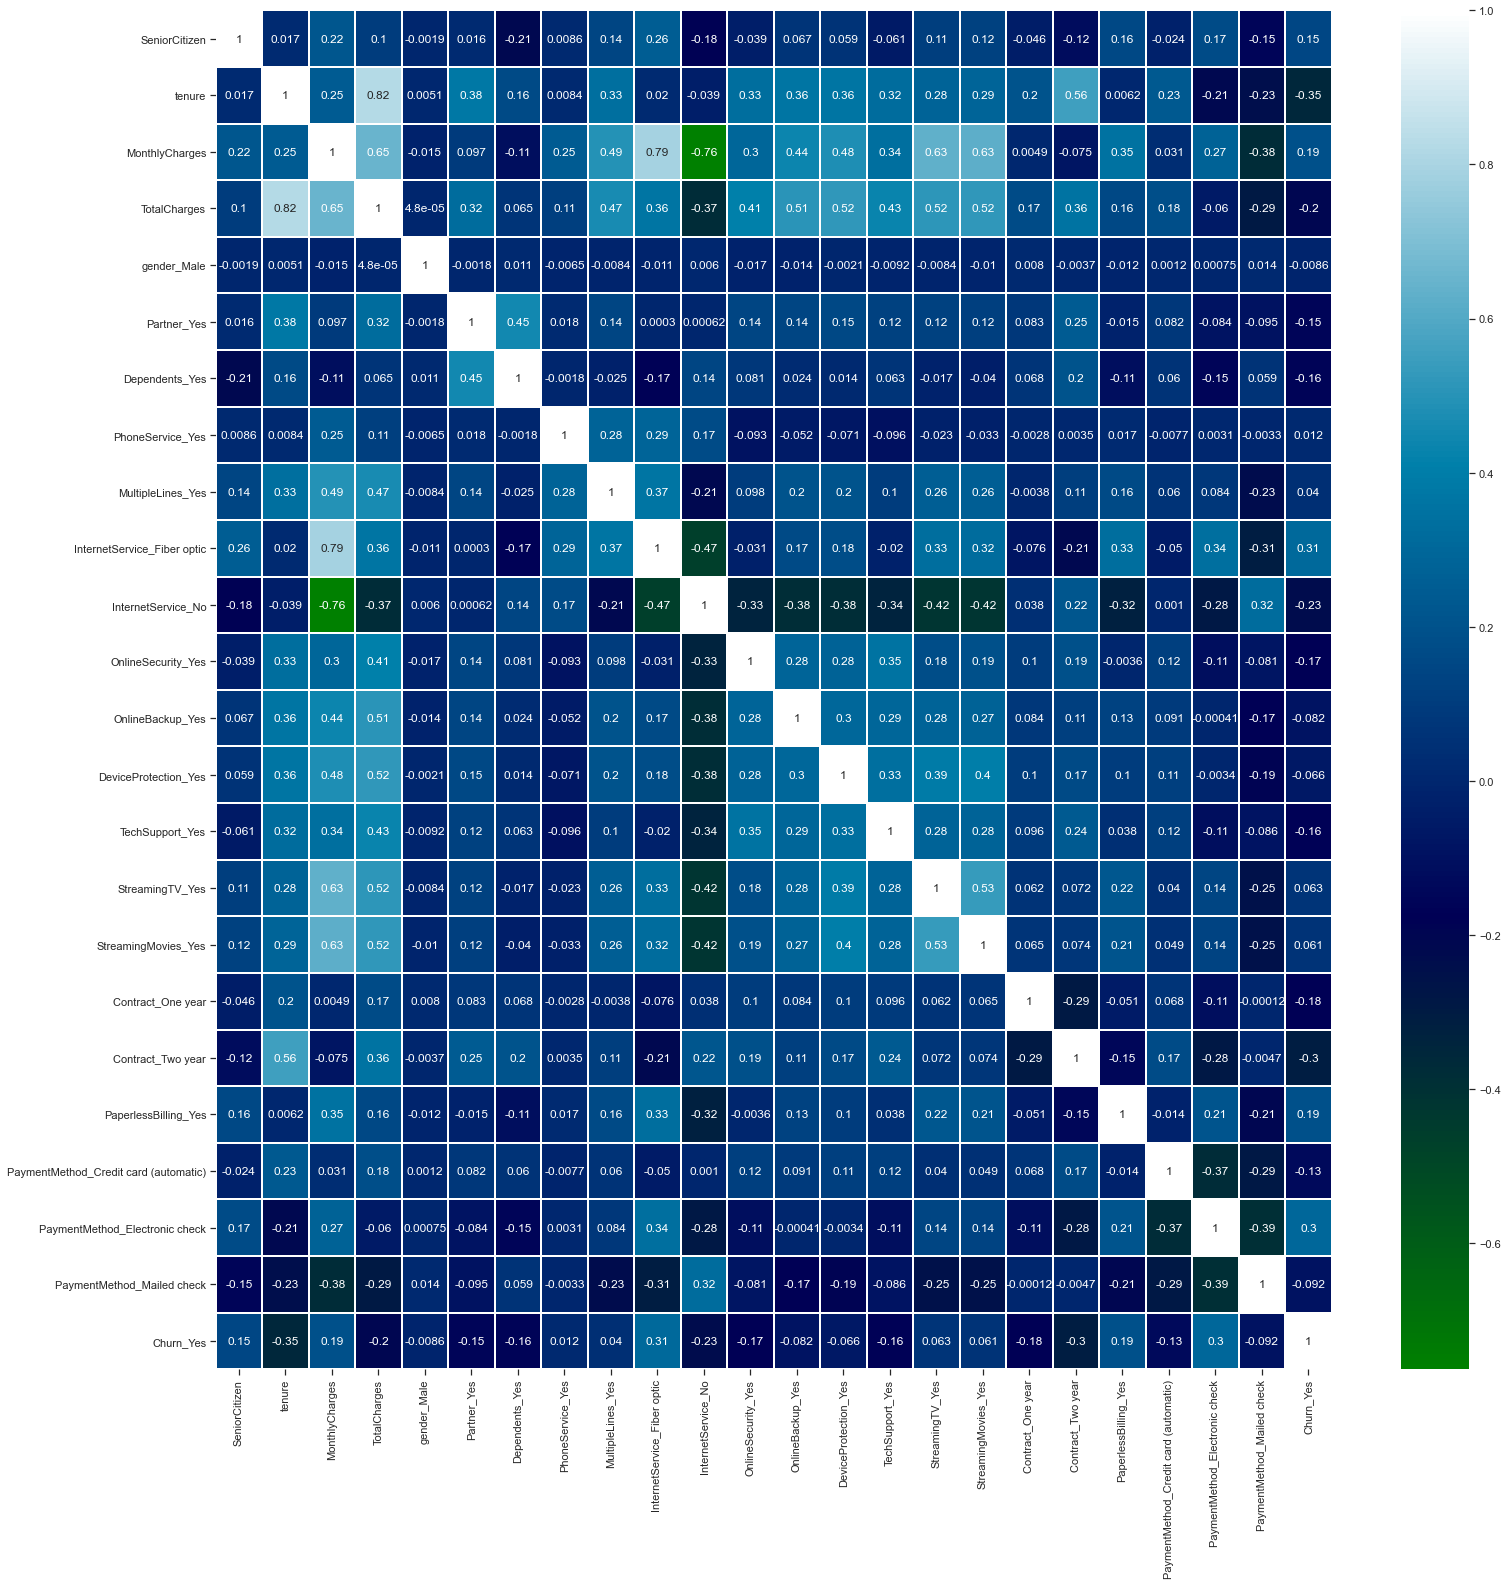

In [246]:
plt.figure(figsize = (25,25))
sns.heatmap(b.corr(), annot = True, linewidths = 1, cmap = 'ocean')

### 4. Selecting features for model
- Columns showing high multicollinearity (using VIF) and those showing low correlation with output (Churn) are dropped
- Dropping columns showing high multicollinearity : 'MonthlyCharges', 'TotalCharges'
- Dropping columns having low correlation with Churn : 
    - 'PhoneService_Yes', 'gender_Male', 'PhoneService_Yes', 
    - 'MultipleLines_Yes', 'OnlineBackup_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'

In [72]:
data_set = b.drop(['MonthlyCharges', 'TotalCharges', 'PhoneService_Yes', 'gender_Male', 'PhoneService_Yes', 
                   'MultipleLines_Yes', 'OnlineBackup_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
                 axis=1)

#### Scaling 'tenure' column
- will enhance speed of the model

In [370]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_set[['tenure']] = scaler.fit_transform(data_set[['tenure']])

In [392]:
data_set

,SeniorCitizen,tenure,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,DeviceProtection_Yes,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0.013889,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,0.472222,0,0,0,0,1,1,0,1,0,0,0,0,1,0
2,0,0.027778,0,0,0,0,1,0,0,0,0,1,0,0,1,1
3,0,0.625000,0,0,0,0,1,1,1,1,0,0,0,0,0,0
4,0,0.027778,0,0,1,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,1,1,0,0,1,1,1,1,0,1,0,0,1,0
7039,0,1.000000,1,1,1,0,0,1,0,1,0,1,1,0,0,0
7040,0,0.152778,1,1,0,0,1,0,0,0,0,1,0,1,0,0
7041,1,0.055556,1,0,1,0,0,0,0,0,0,1,0,0,1,1


### 5. Creating Train and test data

In [393]:
X = data_set.drop('Churn_Yes', axis=1)
y = data_set.Churn_Yes

In [394]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.432, random_state=0)

In [395]:
print(X_train.shape)
print(X_test.shape)

(4000, 15)
(3043, 15)


### 6. Over-sampling training data using Random_Over_Sampler

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

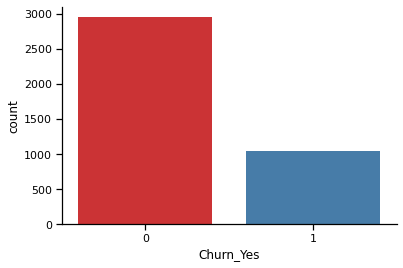

In [413]:
sns.countplot(y_train, palette='Set1')
sns.despine()

In [374]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(0.7) ## minority class will become 70% of majority class
X_train_new, y_train_new = ros.fit_resample(X_train,y_train)

In [433]:
print(y_train.value_counts())
print(y_train_new.value_counts())

0    2953
1    1047
Name: Churn_Yes, dtype: int64
0    2953
1    2067
Name: Churn_Yes, dtype: int64


### 7. Logistic Regression with Hypertuning using RandomizedSearchCV

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(verbose=1)

In [416]:
grid_lr = {'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
           'max_iter' : [100,200,300,400,800],
           'C' :[400, 100, 10, 1.0, 0.1, 0.01]
          }

In [417]:
rscv_lr = RandomizedSearchCV(lr, param_distributions=grid_lr, cv=3, random_state=0)
rscv_lr.fit(X_train_new,y_train_new)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


convergence after 18 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 15 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

convergence after 38 epochs took 0 seconds
convergence after 32 epochs took 0 seconds
convergence after 38 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 18 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


convergence after 33 epochs took 0 seconds
convergence after 33 epochs took 0 seconds
convergence after 35 epochs took 0 seconds
convergence after 18 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

RandomizedSearchCV(cv=3, estimator=LogisticRegression(verbose=1),
                   param_distributions={'C': [400, 100, 10, 1.0, 0.1, 0.01],
                                        'max_iter': [100, 200, 300, 400, 800],
                                        'solver': ['newton-cg', 'lbfgs', 'sag',
                                                   'saga']},
                   random_state=0)

In [418]:
final_lr = rscv_lr.best_estimator_
final_lr

LogisticRegression(C=0.1, max_iter=400, solver='sag', verbose=1)

In [419]:
predict_final_lr = final_lr.predict(X_test)

### 8. Performance
- Since Telecom Company is more concerned about stopping people from leaving, hence its the False Negative (Type-II error) which is our biggest concern
- False negative means that the model declared those person as 'Not leaving' who were actually leaving the company
- The best parameter to measure False Negative (Type-II error) is Recall 
- Hence the objective was to increase Recall value while keeping the precision value stable
- Over-sampling the train dataset helped increase Recall though at a slight cost of precision (f1_score remained stable)
- Final Result
    - Accuracy = 77.8%
    - Recall = 70%
    - Precission = 57%
    - F1_score = 63%

In [428]:
print('accuracy =', metrics.accuracy_score(y_test,predict_final_lr))
print('confusion_matrix : \n',metrics.confusion_matrix(y_test,predict_final_lr))
print('Classification_report : \n',metrics.classification_report(y_test,predict_final_lr))

<IPython.core.display.Javascript object>

accuracy = 0.7775221820571804


<IPython.core.display.Javascript object>

confusion_matrix : 
 [[1791  430]
 [ 247  575]]


<IPython.core.display.Javascript object>

Classification_report : 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      2221
           1       0.57      0.70      0.63       822

    accuracy                           0.78      3043
   macro avg       0.73      0.75      0.74      3043
weighted avg       0.80      0.78      0.78      3043

